In [ ]:
import numpy as np
import torch
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
for i in range(0,10):
  if i == 0 :
    data = torch.load('/content/drive/MyDrive/out/0')
  else:
    b = torch.load('/content/drive/MyDrive/out/{}'.format(i))
    data = torch.cat((data,b), dim = 0)

In [ ]:
for i in range(0,10):
  if i == 0 :
    lbl = torch.load('/content/drive/MyDrive/out/L0')
  else:
    b = torch.load('/content/drive/MyDrive/out/L{}'.format(i))
    lbl = torch.cat((lbl,b), dim = 0)

In [ ]:
print (data.shape)
print (lbl.shape)

torch.Size([600, 50])
torch.Size([600])


In [ ]:
data = data.detach().numpy()

In [ ]:
lbl = lbl.detach().numpy()

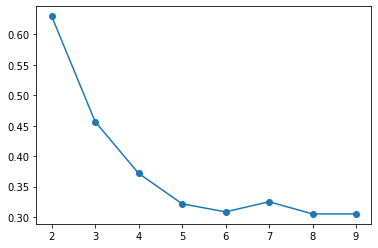

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
import matplotlib.pyplot as plt
acc_train = []
for i in range (2,10):
  clf = KN(n_neighbors=i).fit(data,lbl)
  y_p = clf.predict(data)
  acc_tr = accuracy_score(lbl, y_p)
  acc_train.append(acc_tr)

x = range(2,10)
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')
plt.show()

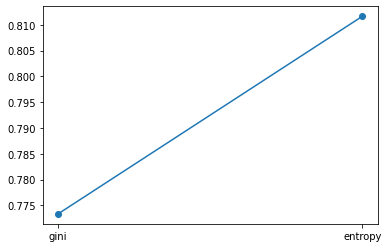

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
criteria = ['gini' , 'entropy']
acc_train = []
for i in criteria:
  clf = RF(criterion=i,max_samples = 100, max_depth = 10).fit(data,lbl)
  y_p = clf.predict(data)
  acc_tr = accuracy_score(lbl, y_p)
  acc_train.append(acc_tr)

x = ['gini' , 'entropy']
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')

plt.show()

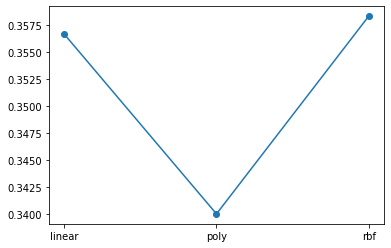

In [ ]:
from sklearn.svm import SVC
kernel = ['linear', 'poly', 'rbf']
acc_train = []
for i in kernel:
  clf = SVC(kernel=i).fit(data,lbl)
  y_p = clf.predict(data)
  acc_tr = accuracy_score(lbl, y_p)
  acc_train.append(acc_tr)

x = ['linear', 'poly', 'rbf']
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')

plt.show()